Building a simple neural network using the Iris Flower dataset with PyTorch!

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [7]:
#create a model class that inherits the nn.module
class Model(nn.Module):
  # input layer (4 features of the flower) ->
  # Hidden layer 1 (no of neurons) ->
  # Hidden Layer 2 (no of neurons) ->
  # Ouput (3 classes of the iris flower)
  def __init__(self,in_features=4,h1=8,h2=9,out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  #create a function that moves the data forward
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [3]:
#creating a random seed for randomization
torch.manual_seed = 42
model = Model()


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('Iris flowers dataset.csv')

In [7]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [8]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [9]:
df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [10]:
#changing the target values to numbers
df['variety'] = df['variety'].replace('Setosa',0.0)
df['variety'] = df['variety'].replace('Versicolor',1.0)
df['variety'] = df['variety'].replace('Virginica',2.0)

In [11]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [12]:
#train test split
X = df.drop('variety',axis=1)
y = df['variety']

In [13]:
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: variety, Length: 150, dtype: float64

In [15]:
df['variety'].value_counts()

0.0    50
1.0    50
2.0    50
Name: variety, dtype: int64

In [16]:
df.isnull()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [18]:
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [19]:
#Converting these values to Numpy arrays
X = X.values
y = y.values

In [20]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [21]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
#convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [25]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [105]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [93]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [106]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 1000
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



Epoch: 0 and loss: 0.046578120440244675
Epoch: 10 and loss: 0.04658057540655136
Epoch: 20 and loss: 0.04657876491546631
Epoch: 30 and loss: 0.04657825455069542
Epoch: 40 and loss: 0.046578098088502884
Epoch: 50 and loss: 0.04657815024256706
Epoch: 60 and loss: 0.04657812789082527
Epoch: 70 and loss: 0.04657810926437378
Epoch: 80 and loss: 0.04657810181379318
Epoch: 90 and loss: 0.04657810553908348
Epoch: 100 and loss: 0.04657808691263199
Epoch: 110 and loss: 0.04657810926437378
Epoch: 120 and loss: 0.04657809063792229
Epoch: 130 and loss: 0.04657809063792229
Epoch: 140 and loss: 0.046578098088502884
Epoch: 150 and loss: 0.0465780645608902
Epoch: 160 and loss: 0.04657808691263199
Epoch: 170 and loss: 0.0465780645608902
Epoch: 180 and loss: 0.046578068286180496
Epoch: 190 and loss: 0.046578098088502884
Epoch: 200 and loss: 0.04657807573676109
Epoch: 210 and loss: 0.04657803848385811
Epoch: 220 and loss: 0.046578072011470795
Epoch: 230 and loss: 0.0465780608355999
Epoch: 240 and loss: 0.0

Text(0.5, 0, 'Epoch')

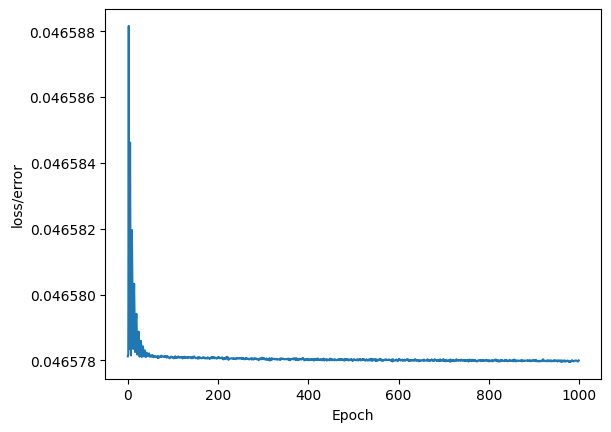

In [107]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [109]:
#Evaluating the model with the test dataset
with torch.no_grad():
   #turn off back propagation
   y_eval = model.forward(X_test) #X_test are the features and y_eval will be the predictions
   loss = criterion(y_eval,y_test) #find the loss or error

In [111]:
loss

tensor(0.0153)

In [117]:
#check how many the model got correct out of the 30 values in the test dataset
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)



    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item() }') #will tell us the type of the iris flower the model thinks it is

    #to check if predicted value is correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'We got {correct} correct!!')

1.) tensor([-21.5576,   9.9737,   0.8851]) 	 1 	 1
2.) tensor([ 13.9523, -16.1227, -20.7421]) 	 0 	 0
3.) tensor([-43.3070,  -2.8688,  19.6875]) 	 2 	 2
4.) tensor([-22.2109,   8.5327,   2.2476]) 	 1 	 1
5.) tensor([-24.4655,   9.1249,   2.6663]) 	 1 	 1
6.) tensor([ 12.8485, -14.6684, -19.5116]) 	 0 	 0
7.) tensor([-15.2743,  11.6851,  -3.2639]) 	 1 	 1
8.) tensor([-32.0388,   2.3918,  10.9696]) 	 2 	 2
9.) tensor([-24.7908,   6.6813,   4.7733]) 	 1 	 1
10.) tensor([-17.0534,  11.5197,  -2.2866]) 	 1 	 1
11.) tensor([-28.9770,   4.3955,   8.2019]) 	 2 	 2
12.) tensor([ 13.8269, -16.3134, -19.1440]) 	 0 	 0
13.) tensor([ 15.8249, -18.9494, -21.3316]) 	 0 	 0
14.) tensor([ 13.6529, -16.0110, -19.2490]) 	 0 	 0
15.) tensor([ 14.7246, -17.5107, -20.1755]) 	 0 	 0
16.) tensor([-23.1234,   8.7611,   2.3993]) 	 1 	 1
17.) tensor([-35.1379,  -0.0405,  14.2477]) 	 2 	 2
18.) tensor([-16.7612,  11.2584,  -2.1940]) 	 1 	 1
19.) tensor([-20.6870,   9.3129,   1.0618]) 	 1 	 1
20.) tensor([-34.5304

In [118]:
#Making prediction on new data
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [119]:
#feeding it to the neural network
with torch.no_grad():
  print(model(new_iris))

tensor([ 14.3044, -17.0691, -19.2122])


In [121]:
newer_iris = torch.tensor([5.9,3.0,5.1,1.8])

In [126]:
def predict_species(output_tensor):
    _, predicted_index = torch.max(output_tensor, 1)
    if predicted_index == 0:
        return 'Predicted species: Setosa'
    elif predicted_index == 1:
        return 'Predicted species: Versicolor'
    elif predicted_index == 2:
        return 'Predicted species: Virginica'
    else:
        return 'Unknown prediction'

def make_prediction(model):
    sepal_length = float(input('Enter the sepal length: '))
    sepal_width = float(input('Enter the sepal width: '))
    petal_length = float(input('Enter the petal length: '))
    petal_width = float(input('Enter the petal width: '))

    new_iris = torch.tensor([sepal_length, sepal_width, petal_length, petal_width], dtype=torch.float32)

    with torch.no_grad():
        output_tensor = model(new_iris.unsqueeze(0))
        prediction = predict_species(output_tensor)

    print(prediction)

# Example usage:
make_prediction(model)


Enter the sepal length: 5.9
Enter the sepal width: 3.0
Enter the petal length: 5.1
Enter the petal width: 1.8
Predicted species: Virginica


In [127]:
#save the model
torch.save(model.state_dict(), 'Simple Iris Model using Neural Network.pt')

In [8]:
import pickle

In [9]:
#creating a new pkl file to dump the model
new_file = open('model.pckl','wb')